### PROYECTO DS - CUSTOMER CHURN (PARTE III)

Maylen Paz Idrovo  
Coderhouse DS

### ABSTRACT

<div style="text-align: justify;">
La fuga de clientes es un desafío importante para la industria bancaria, ya que la retención de clientes es fundamental para la rentabilidad a largo plazo. En este proyecto, se analiza el conjunto de datos "BankChurners.csv" obtenido del repositorio Kaggle para comprender los factores que influyen en la decisión de los clientes de abandonar o no el banco. La motivación detrás de este análisis radica en la necesidad de identificar las razones detrás de la fuga de clientes y proporcionar información valiosa para mejorar las estrategias de retención. A través de la implementación de un modelo de aprendizaje automático supervisado, se busca predecir la tasa de abandono de los clientes y ofrecer a los bancos una base sólida para tomar medidas preventivas.
</div>

### AUDIENCIA

<div style="text-align: justify;">
Profesionales y expertos en la industria bancaria y de servicios financieros. Esto incluye a directores y gerentes de bancos, 
analistas de datos, científicos de datos, expertos en retención de clientes y cualquier persona involucrada en la toma de 
decisiones estratégicas relacionadas con la retención de clientes en el sector bancario.
</div>

### CONTEXTO COMERCIAL Y ANALÍTICO

<div style="text-align: justify;">
La industria bancaria enfrenta una serie de desafíos, que incluyen una creciente competencia, cambios en las preferencias de los consumidores y el cumplimiento de regulaciones. Uno de los desafíos más significativos es la fuga de clientes ya que, una alta tasa de fuga puede resultar en pérdida de ingresos, aumento de costos y disminución de la satisfacción del cliente.
<br><br>
El contexto analítico se basa en el uso del conjunto de datos, el cual contiene información sobre más de 10,000 clientes incluyendo datos demográficos, información financiera, hábitos bancarios e interacciones con el banco. El objetivo es utilizar estos datos para identificar los factores clave que influyen en la decisión de los clientes de abandonar o no el banco.
</div>

### PROBLEMA COMERCIAL

<div style="text-align: justify;">
El problema de la fuga de clientes en la industria bancaria es ampliamente reconocido. Al identificar los factores más influyentes en la decisión de los clientes de abandonar el banco, las entidades financieras pueden diseñar estrategias efectivas para reducir esta fuga y mejorar la retención de clientes. Esto no solo puede resultar en un aumento de los ingresos y una disminución de los costos, sino también en una mejora general en la satisfacción del cliente.
</div>

### OBJETIVO

<div style="text-align: justify;">
Desarrollar un modelo predictivo para identificar a los clientes con mayor probabilidad de abandonar el banco y mejorar las 
estrategias de retención, maximizando la rentabilidad a largo plazo.
</div>  

### PREGUNTAS QUE BUSCAMOS RESOLVER 

- ¿Los clientes con edades más jóvenes tienen una tasa de abandono más alta que los clientes con edades más avanzadas?
- ¿Los clientes con ingresos más altos tienen una tasa de abandono más baja que los clientes con ingresos más bajos?
- ¿El género es una variable significativa en la tasa de abandono bancaria?  
- ¿Qué variables se correlacionan fuertemente con la tasa de abandono?
- ¿Existe alguna relación entre el tipo de tarjeta que tiene un cliente y su probabilidad de abandono?
- ¿Hay una relación entre el límite de crédito de los clientes y la probabilidad de abandono?

### EXPLORATORY DATA ANALYSIS (EDA)

### Configuramos la notebook

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# IQR/Z score.
from scipy.stats import stats
from scipy.stats import ttest_ind

# Seleción de variables.
from sklearn.feature_selection import SelectKBest

# Modelos Selección.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Modelos.
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Métricas.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, r2_score, mean_squared_error,  mean_absolute_error, ConfusionMatrixDisplay

print('Setup Complete')

Setup Complete


In [2]:
# Ruta del dataset
bankchurn_filepath = "C:/Users/User/Desktop/DS+Analytics/Coderhouse/Data Science/Entregas/Entrega 1/Datasets/Bank Customer Churn/BankChurners.csv"

In [3]:
# Leemos el archivo en la variable bankchurn y hacemos una copia del df
bankchurn = pd.read_csv(bankchurn_filepath)
newbankchurn = bankchurn.copy()

In [4]:
## Examinamos la data

In [5]:
# Mostramos las primeras 5 filas de la data
newbankchurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
# Mostramos las últimas 5 filas de la data
newbankchurn.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [7]:
# Para una mejor lectura, renombramos las últimas dos columnas
newbankchurn = newbankchurn.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NBClass1', 
                                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NBClass2'})

In [8]:
# Resumen de la data
newbankchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
## Descripción del dataset (se explicarán todas las variables)

# CLIENTNUM: Identificador único para cada cliente. (Entero)
# Attrition_Flag: Bandera que indica si el cliente ha cancelado o no. (Booleano)
# Customer_Age: Edad del cliente. (Entero)
# Gender: Género del cliente. (Cadena de texto)
# Dependent_count: Número de dependientes que tiene el cliente. (Entero)
# Education_Level: Nivel educativo del cliente. (Cadena de texto)
# Marital_Status: Estado civil del cliente. (Cadena de texto)
# Income_Category: Categoría de ingresos del cliente. (Cadena de texto)
# Card_Category: Tipo de tarjeta que tiene el cliente. (Cadena de texto)
# Months_on_book: Cuánto tiempo ha estado el cliente en los libros. (Entero)
# Total_Relationship_Count: Número total de relaciones que el cliente tiene con el proveedor de tarjetas de crédito. (Entero)
# Months_Inactive_12_mon: Número de meses en los que el cliente ha estado inactivo en los últimos doce meses. (Entero)
# Contacts_Count_12_mon: Número de contactos que el cliente ha tenido en los últimos doce meses. (Entero)
# Credit_Limit: Límite de crédito del cliente. (Entero)
# Total_Revolving_Bal: Saldo total en rotación del cliente. (Entero)
# Avg_Open_To_Buy: Promedio de la relación de abiertos a comprar del cliente. (Entero)
# Total_Amt_Chng_Q4_Q1: Cantidad total cambiada del cuarto trimestre al primer trimestre. (Entero)
# Total_Trans_Amt: Monto total de transacción. (Entero)
# Total_Trans_Ct: Número total de transacciones. (Entero)
# Total_Ct_Chng_Q4_Q1: Número total cambiado del cuarto trimestre al primer trimestre. (Entero)
# Avg_Utilization_Ratio: Promedio de la tasa de utilización del cliente. (Entero)
# NBClass1: Clasificador de Naive Bayes para predecir si alguien se dará de baja o no en función de las características
# NBClass2: Clasificador de Naive Bayes para alerta de abandono, categoría de tarjeta, recuento de contactos de 12 meses, recuento de dependientes, nivel educativo, meses de inactividad de 12 meses

Este dataset fue recuperado de Kaggle: https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m?select=BankChurners.csv

In [10]:
# Como mi objetivo es saber quiénes han hecho 'churn' al servicio, exploraré esa variable
newbankchurn['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
# Procedo a convertir las variables 'Attrition_Flag' a binaria
newbankchurn['Attrition_Flag'] = newbankchurn['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
newbankchurn

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBClass1,NBClass2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [12]:
# Revisamos las estadísticas descriptivas del df
newbankchurn.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBClass1,NBClass2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [13]:
# Análisis rápido de los estadísticos descriptivos de las variables:
# CLIETNUM simplemente es un código asignado a cada cliente, así que hacemos caso omiso a sus resultados
# Desde Attrition_Flag hasta Contacts_Count_12_mon Total aparentemente se ven bien sus datos
# Credit Limit y Avg_Open_To_Buy presentan un gran sesgo a la derecha (mediana menor que la media)
# Las varibles restantes también se ven bien aunque algunas presentan un ligero sesgo

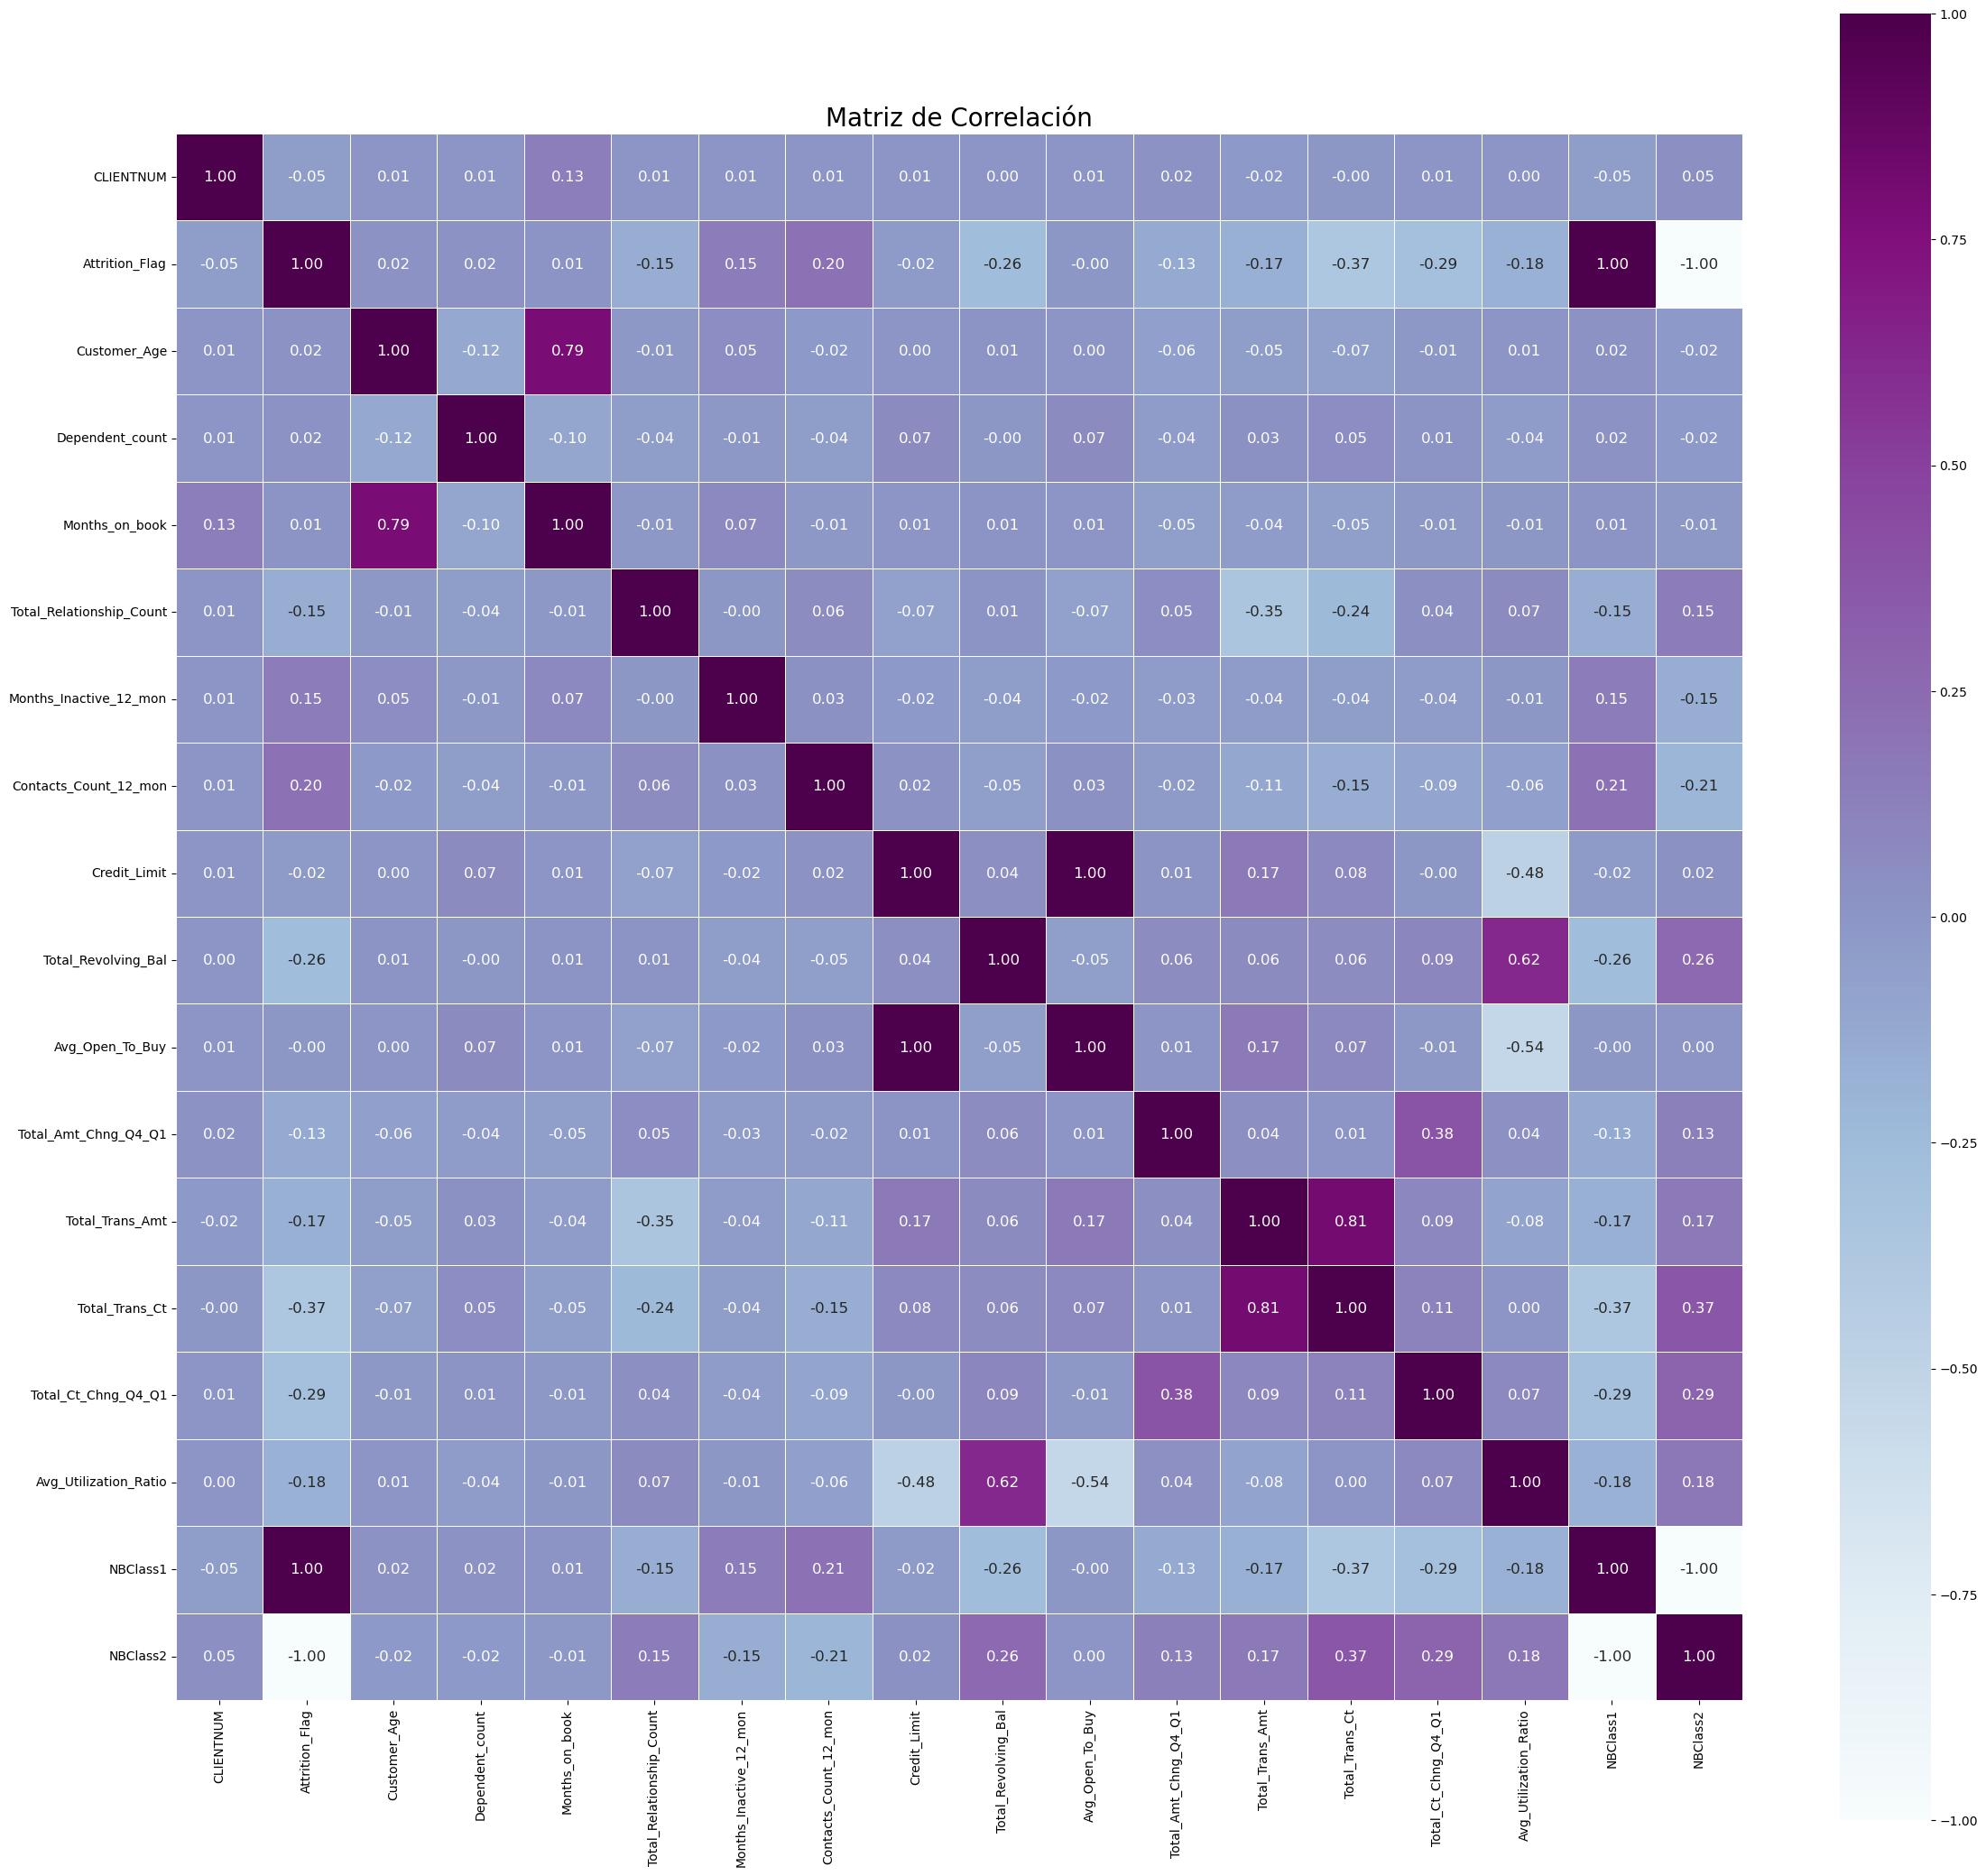

In [14]:
# Graficamos un heatmap para conocer la correlación
newbankchurn_corr = newbankchurn.corr()

plt.figure(figsize=(28, 26))
sns.heatmap(newbankchurn_corr, annot=True, cmap='BuPu', fmt='.2f', linewidths=.5, annot_kws={'size': 12}, square=True, 
            center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación', fontsize=20)
plt.show()

In [15]:
# En base al heatmap, eliminaré las variables que están provocando una multicolinealidad perfecta (corr = ± 1) porque hace que 
# mi matriz no sea invertible y no pueda obtener los coeficientes. Además, una de las variables que presentan una correlación
# fuerte (corr = 0.81)
eliminar_columnas = ['Avg_Open_To_Buy', 'Total_Trans_Amt', 'NBClass1', 'NBClass2']
newbankchurn = newbankchurn.drop(eliminar_columnas, axis=1)
newbankchurn = newbankchurn.rename(columns={'CLIENTNUM': 'ClientNum'})

In [16]:
# Aunque también hay otras variables que están indicando una posible multicolinealidad debido a su alta correlación, exploraré 
# su correlación específica con la variable dependiente que sería 'Attrition_Flag'
corr = abs(newbankchurn.corr())
corr[['Attrition_Flag']].sort_values(by = 'Attrition_Flag',ascending = False).style.background_gradient()

,Attrition_Flag
Attrition_Flag,1.000000
Total_Trans_Ct,0.371403
Total_Ct_Chng_Q4_Q1,0.290054
Total_Revolving_Bal,0.263053
Contacts_Count_12_mon,0.204491
Avg_Utilization_Ratio,0.178410
Months_Inactive_12_mon,0.152449
Total_Relationship_Count,0.150005
Total_Amt_Chng_Q4_Q1,0.131063
ClientNum,0.046430


In [17]:
# Observamos que hay una correlación moderada, por ende, no se eliminarán esas variables ya que parecen relevantes para el 
# futuro modelo. Además, desde un enfoque empresarial cada variable restante es importante porque proporciona información 
# valiosa sobre los factores que afectan el estado del cliente. En este caso, no hay presencia de NaN.

### Visualizaciones en Matplotlib y Seaborn

In [18]:
# En base al dataset elegido, procederemos a realizar un análisis visual utilizando librerías gráficas

In [19]:
newbankchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientNum                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

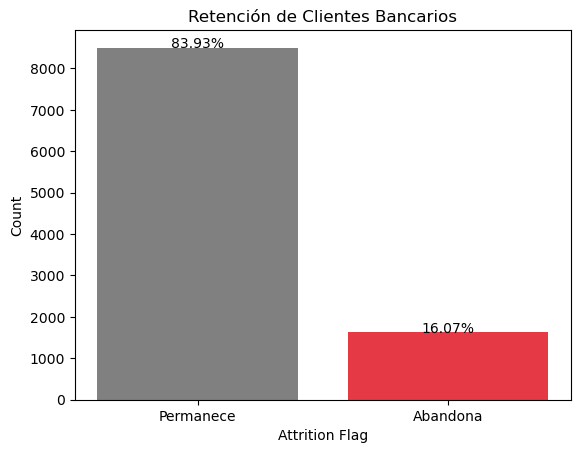

In [20]:
# RETENCIÓN DE CLIENTES (%)

# Cambiamos el nombre de los valores de 'Attrition_Flag'
newbankchurn['Attrition_Flag'].replace({0: 'Permanece', 1: 'Abandona'}, inplace=True)

# Calculamos los valores para las barras y los porcentajes
valores = newbankchurn['Attrition_Flag'].value_counts().values
total = sum(valores)
porcentajes = [f'{(v/total)*100:.2f}%' for v in valores]

# Graficamos
plt.bar(newbankchurn['Attrition_Flag'].value_counts().index, valores, color=['gray', '#e63946'])
plt.title('Retención de Clientes Bancarios')
plt.ylabel('Count')
plt.xlabel('Attrition Flag')
for i in range(len(porcentajes)):
    plt.text(i, valores[i], porcentajes[i], ha='center')
plt.show()

In [21]:
# Observamos que el 16.07% de los 10127 clientes que han utilizado el servicio bancario han abandonado, lo que representa una 
# cantidad importante de clientes que la empresa ha perdido. Si bien no es un porcentaje abismal, es importante tomar medidas
# para evitar que este número siga aumentando en el corto/mediano plazo. Quizás la entidad bancaria debería ofrecer incentivos
# especiales, descuentos o mejorar la experiencia del usuario.

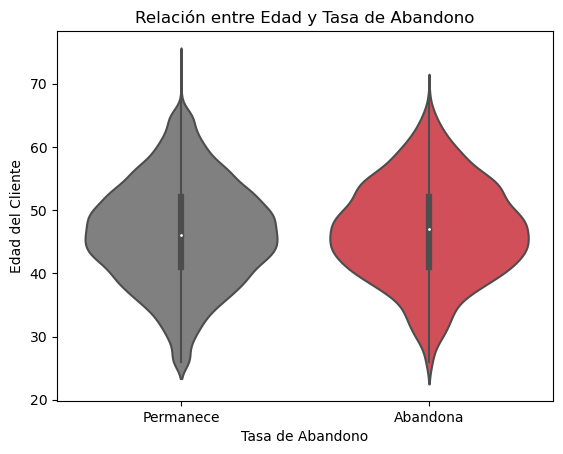

In [22]:
# RELACIÓN ENTRE LA EDAD DE LOS CLIENTES Y LA TASA DE ABANDONO

newbankchurn['Attrition_Flag'].replace({0: 'Permanece', 1: 'Abandona'}, inplace=True)
sns.violinplot(x='Attrition_Flag', y='Customer_Age', data=newbankchurn, palette=['gray', '#e63946'])
plt.title('Relación entre Edad y Tasa de Abandono')
plt.xlabel('Tasa de Abandono')
plt.ylabel('Edad del Cliente')
plt.show()

In [23]:
# Vemos que no existe visualmente una diferencia significativa entre las edades de los clientes que han permanecido o abandonado
# porque su densidad es similar aunque el violinplot de 'Permanece' presenta una cola más larga en su extremo derecho, lo cual
# indica que hay más clientes utilizando el servicio.

In [24]:
# EDAD PROMEDIO DE CLIENTES QUE HAN ABANDONADO EL BANCO

clientes_abandono= newbankchurn[newbankchurn['Attrition_Flag']=='Abandona']
edad_promedio = round(clientes_abandono['Customer_Age'].mean(), 2)
print(f'La edad promedio de los clientes que abandonan es de {edad_promedio} años.')

La edad promedio de los clientes que abandonan es de 46.66 años.


In [25]:
# La edad promedio es de 47 años aproximadamente, lo que sugiere que existe un grupo específico de clientes en torno a esta edad
# que tienen una mayor propensión a abandonar el banco. La entidad debe enfocarse en obtener un feedback porque quizás este 
# grupo de clientes esté buscando un cambio en sus necesidades financieras y como no lo encuentran, prefieren darse de baja.

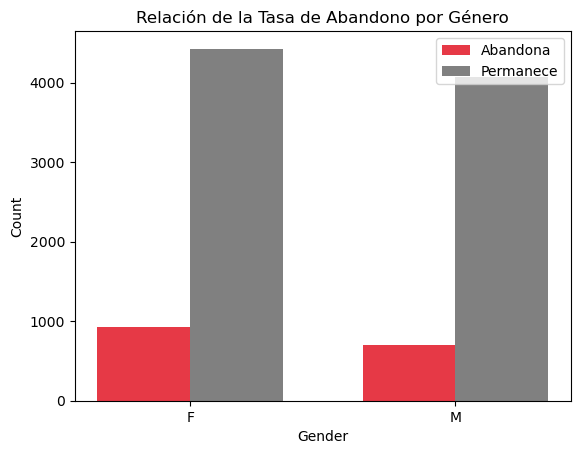

In [26]:
# RELACIÓN DEL GÉNERO CON LA TASA DE ABANDONO

# Agrupamos los datos por género y tasa de abandono
data = newbankchurn.groupby(['Gender', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos las etiquetas de las barras y las posiciones en el eje x
labels = data.index
x = np.arange(len(labels))

# Creamos las barras agrupadas
for i, colname in enumerate(data.columns):
    ax.bar(x + (i - 0.5) * 0.35, data[colname], width=0.35, label=colname, color=['#e63946', 'gray'][i])

# Configuramos los ejes y la leyenda
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.title('Relación de la Tasa de Abandono por Género')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend()

plt.show()

In [27]:
# Ho: No existe una diferencia significativa en la tasa de abandono de clientes entre géneros
# H1: Existe una diferencia significativa en la tasa de abandono de clientes entre géneros

newbankchurn['Attrition_Flag'].replace({'Permanece': 0, 'Abandona': 1}, inplace=True)
newbankchurn['Gender'].replace({'M': 1, 'F': 0}, inplace=True)

# Obtenemos los datos de edad para los clientes que han abandonado el servicio
edad_abandona = newbankchurn[newbankchurn['Attrition_Flag'] == 1]['Gender']

# Obtenemos los datos de edad para los clientes que no han abandonado el servicio
edad_permanece = newbankchurn[newbankchurn['Attrition_Flag'] == 0]['Gender']

# Realizamos la prueba t de Student
t, p = ttest_ind(edad_abandona, edad_permanece)

# Imprimir el resultado
print('t =', t)
print('p =', p)

t = -3.7529997388764227
p = 0.0001757076182398869


In [28]:
# En el gráfico de barras observamos que las mujeres son las más propensas a abandonar el servicio bancario aunque su diferencia
# no es abismal, se corroboró si esa variable juega un rol importante. En base a los resultados vemos que el p-value es de
# 0.00018 lo cual indica que rechazamos la hipótesis nula planteada y afirmamos que existe una diferencia significativa en las
# proporciones de género entre ambos grupos a un nivel de significancia del 0.05

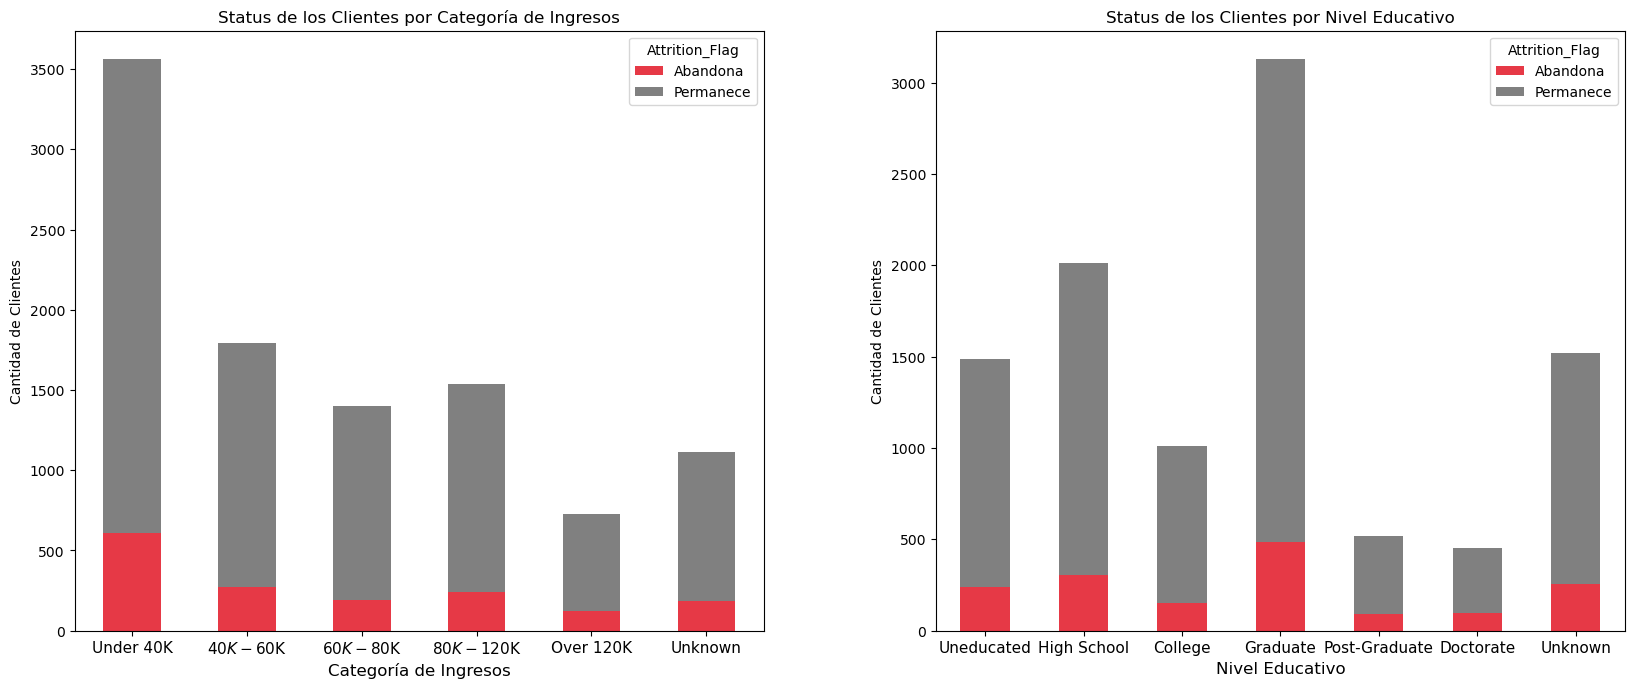

In [29]:
# STATUS DE LOS CLIENTES POR INGRESOS

# Primero hagamos unos reemplazos
newbankchurn['Attrition_Flag'].replace({0:'Permanece', 1:'Abandona'}, inplace=True)
newbankchurn['Income_Category'].replace('$120K +', 'Over 120K', inplace=True)
newbankchurn['Income_Category'].replace('Less than $40K', 'Under 40K', inplace=True)

# Definimos el orden de las categorías
orden_ingresos = ['Under 40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Over 120K', 'Unknown']

# Transformamos y reordenamos la columna 'Income_Category' en una variable categórica ordenada
newbankchurn['Income_Category'] = pd.Categorical(newbankchurn['Income_Category'], ordered=True)
newbankchurn['Income_Category'] = newbankchurn['Income_Category'].cat.reorder_categories(orden_ingresos)

# Creamos un DataFrame con los valores para el gráfico apilado de Income_Category
df_ingresos = newbankchurn.groupby(['Income_Category', 'Attrition_Flag'])['Attrition_Flag'].count().unstack(level=1)

# Gráfico apilado de Income_Category
plt.figure(figsize=(20, 15)) # Ajustar el ancho de la figura
ax1 = plt.subplot(1,2,1)
df_ingresos.plot(kind='bar', stacked=True, color=['#e63946', 'gray'], ax=ax1)
ax1.set_title('Status de los Clientes por Categoría de Ingresos')
ax1.set_xlabel('Categoría de Ingresos', fontsize=12) 
ax1.set_ylabel('Cantidad de Clientes')
ax1.tick_params(axis='x', labelrotation=0, labelsize=11) 


# STATUS DE LOS CLIENTES POR NIVEL EDUCATIVO

# Definimos el orden de las categorías
order_edu = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']

# Transformamos y reordenamos la columna 'Education_Level' en una variable categórica ordenada
newbankchurn['Education_Level'] = pd.Categorical(newbankchurn['Education_Level'], ordered=True)
newbankchurn['Education_Level'] = newbankchurn['Education_Level'].cat.reorder_categories(order_edu)

# Creamos un DataFrame con los valores para el gráfico apilado de Education_Level
df_edu = newbankchurn.groupby(['Education_Level', 'Attrition_Flag'])['Attrition_Flag'].count().unstack(level=1)

# Gráfico apilado de Education_Level
ax2 = plt.subplot(1,2,2)
df_edu.plot(kind='bar', stacked=True, color=['#e63946', 'gray'], ax=ax2)
ax2.set_title('Status de los Clientes por Nivel Educativo')
ax2.set_xlabel('Nivel Educativo', fontsize=12) 
ax2.set_ylabel('Cantidad de Clientes')
ax2.tick_params(axis='x', labelrotation=0, labelsize=11) 

# Ajustamos los gráficos para que queden lado a lado y con espacio
plt.subplots_adjust(bottom=0.5, top=0.9, wspace=0.25)
plt.show()

In [30]:
# Observamos que los clientes que poseen un ingreso menor que $40K son los que más poseen una cuenta bancaria pero a la vez, son
# los que tienen mayor probabilidad de abandonar el servicio. En cambio, los que son menos propensos son aquellos cuyos ingresos 
# superan los $120K. En cuanto al nivel educativo, los graduados universitarios tienen una probabilidad más alta de desertar en 
# comparación con aquellos con títulos más avanzados, como maestrías o doctorados.

# Se podría inferir que mientras más alto sea el nivel de educación, éste podría percibir mayores ingresos o tienen una mejor 
# comprensión del beneficio de los servicios bancarios a largo plazo, por ende, no abandonan el servicio.

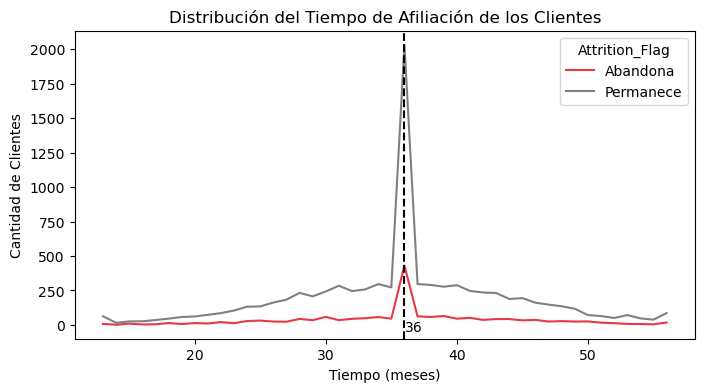

In [31]:
# DISTRIBUCIÓN MENSUAL DEL TIEMPO DE AFILIACIÓN DE LOS CLIENTES CON EL BANCO

data = newbankchurn.groupby(['Months_on_book', 'Attrition_Flag'])['ClientNum'].count().reset_index()

# Calculamos el valor máximo y su posición
max_index = np.argmax(data['ClientNum'])

# Creamos el gráfico y agregamos una línea vertical en el pico máximo
plt.figure(figsize=(8, 4))
sns.set_palette(['#e63946', 'gray'])
sns.lineplot(x='Months_on_book', y='ClientNum', hue='Attrition_Flag', data=data)
plt.title('Distribución del Tiempo de Afiliación de los Clientes')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Cantidad de Clientes')
plt.axvline(x=data.loc[max_index, 'Months_on_book'], color='black', linestyle='--')
plt.text(data.loc[max_index, 'Months_on_book'], data.loc[max_index, 'ClientNum'] - 2000, 
         str(data.loc[max_index, 'Months_on_book']), ha='left', va='top', fontsize=10)
plt.show()

In [32]:
# Se observa que las gráficas no se aproximan a una distribución normal debido a la curtosis (forma de la distribución de los
# datos). El gráfico muestra una gran concentración de datos dentro del rango de 30-40 meses; específicamente, en el mes 36 hay 
# una gran cantidad de clientes que han estado afiliados con la empresa, pero también indica que muchos de ellos abandonan el 
# servicio. Conforme avanza el tiempo, la tendencia disminuye; lo que significa que cada vez menos clientes se mantienen 
# afiliados a la empresa. Este patrón temporal llama mucho la atención porque quizás hay algún evento que provoque la fuga de
# clientes en la industria bancaria.

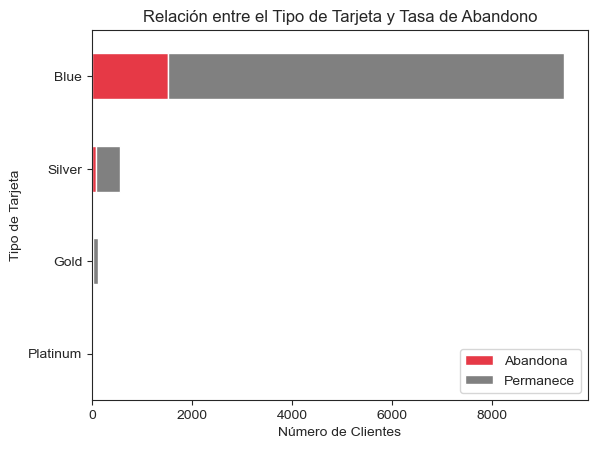

In [33]:
# RELACIÓN DEL TIPO DE TARJETA DEL CLIENTE CON LA TASA DE ABANDONO

# Creamos una tabla de contingencia para las variables Card_Category y Attrition_Flag
contingencia_tabla = pd.pivot_table(data=newbankchurn, values='Customer_Age', index='Card_Category', columns='Attrition_Flag', 
                                   aggfunc=len, fill_value=0)

# Ordenamos las filas por la suma de cada fila
contingencia_tabla = contingencia_tabla.loc[contingencia_tabla.sum(axis=1).sort_values().index]

sns.set_style('ticks')
ax = contingencia_tabla.plot(kind='barh', stacked=True, color=['#e63946', 'gray'])
ax.set_yticklabels(contingencia_tabla.index, rotation=0)
ax.set_title('Relación entre el Tipo de Tarjeta y Tasa de Abandono')
ax.set_xlabel('Número de Clientes')
ax.set_ylabel('Tipo de Tarjeta')
ax.legend(['Abandona', 'Permanece'], loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.show()

In [34]:
# Se aplicó una tabla de contingencia porque queremos conocer la relación entre dos variables categóricas. Observamos que existe
# una relación entre el tipo de tarjeta que tienen los clientes y su tasa de abandono, ya que los clientes que tienen la tarjeta
# Blue tienen una mayor probabilidad de abandono en comparación con los clientes que tienen tarjetas las otras tarjetas. El 
# banco debería explorar estrategias para promover el uso de las otras tarjetas que presenten tasas de abandono más bajas,
# fomentando su adopción y fidelidad por parte de los clientes.

Text(0.5, 1.1, 'Distribución del Límite de Crédito por\nGénero y Status del Cliente')

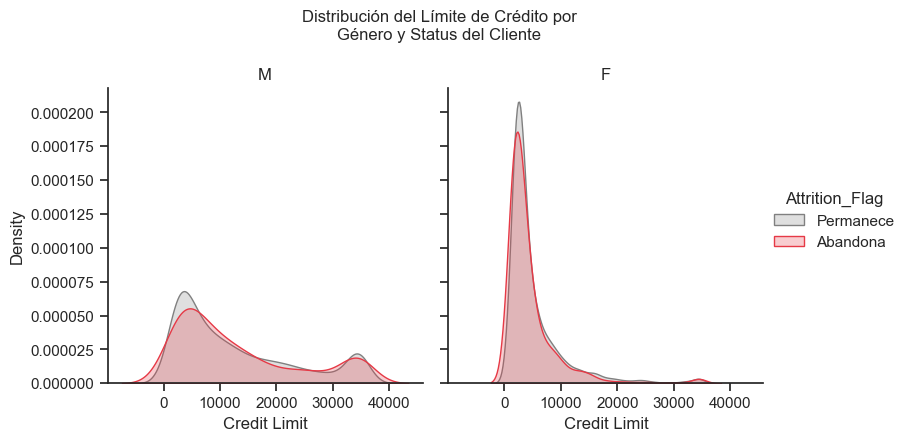

In [35]:
# DISTRIBUCIÓN DEL LÍMITE DE CRÉDITO POR GÉNERO Y STATUS DEL CLIENTE

newbankchurn['Gender'].replace({1: 'M', 0: 'F'}, inplace=True)

sns.set(style='ticks')
g = sns.FacetGrid(newbankchurn, hue='Attrition_Flag', col='Gender', height=4, palette={'Abandona': '#e63946', 
                                                                                       'Permanece': 'gray'})
g.map(sns.kdeplot, 'Credit_Limit', shade=True)
g.add_legend(title='Attrition_Flag')
g.set_axis_labels('Credit Limit', 'Density')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribución del Límite de Crédito por\nGénero y Status del Cliente', fontsize=12, y=1.1)

In [36]:
# Los gráficos muestran la distribución de límites de crédito para hombres y mujeres en el banco, y cómo se relaciona con su 
# decisión de abandonar o permanecer. Vemos que los hombres tienen límites de crédito más altos que las mujeres. Asimismo, cómo 
# la probabilidad de abandono o permanencia varía en función del límite de crédito, es decir, el comportamiento es similar en 
# los picos cuando el cliente permanece como cuando abandona el servicio lo cual sugiere que la decisión de abandonar o seguir
# está influenciada solamente por el límite de crédito. Podríamos inferir que las mujeres son más propensas a permanecer en el
# banco por más tiempo, pero también son las que tienen una mayor tasa de abandono en comparación con los hombres.

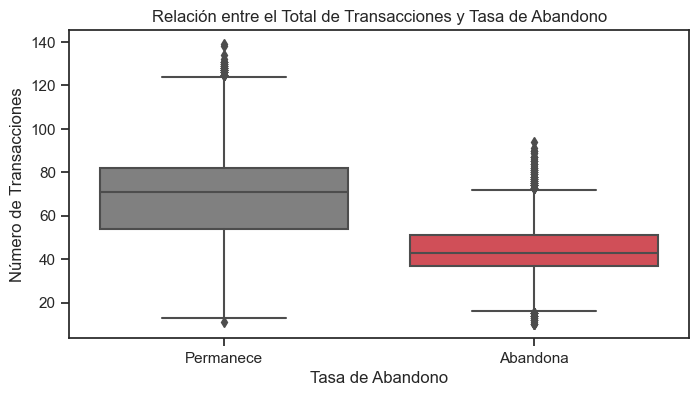

In [37]:
# RELACIÓN ENTRE EL NÚMERO TOTAL DE TRANSACCIONES CON LA TASA DE ABANDONO

plt.figure(figsize=(8,4))
sns.boxplot(data=newbankchurn, x='Attrition_Flag', y='Total_Trans_Ct',
            palette={"Permanece": "gray", "Abandona": '#e63946'})
plt.title("Relación entre el Total de Transacciones y Tasa de Abandono")
plt.xlabel("Tasa de Abandono")
plt.ylabel("Número de Transacciones")
plt.show()

In [38]:
# Se observa que aquellos clientes que realizan más transacciones tienen una mayor probabilidad de permanecer en el banco, lo 
# que indica su satisfacción con su tarjeta de crédito. Por otro lado, se observa una alta tasa de abandono entre aquellos 
# clientes que realizan transacciones de menor cuantía especialmente aquellos por debajo de las 100 transacciones.

### FEATURE SELECTION

A continuación, utilizaremos un método de selección de variables para crear un subconjunto relevante y significativo de las
las características de la base de datos original. El objetivo es reducir la dimensionalidad del conjunto de datos eliminando las variables irrelevantes, y mantener sólo aquellas que aportan información significativa para el modelo.

In [39]:
# Procedemos hacer unos últimos cambios previo al Feature Selection

newbankchurn['Attrition_Flag'].replace({'Permanece':0 , 'Abandona':1 }, inplace=True)
newbankchurn['Gender'].replace({'M':1 , 'F':0 }, inplace=True)
newbankchurn['Education_Level'].replace({'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5,
                                         'Doctorate':6, 'Unknown':7}, inplace=True)
newbankchurn['Marital_Status'].replace({'Single':1, 'Married':2, 'Divorced':3, 'Unknown':4}, inplace=True)
newbankchurn['Card_Category'].replace({'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}, inplace=True)
newbankchurn['Income_Category'].replace({'Under 40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, 'Over 120K':5, 
                                         'Unknown':6}, inplace=True)
newbankchurn.shape

(10127, 19)

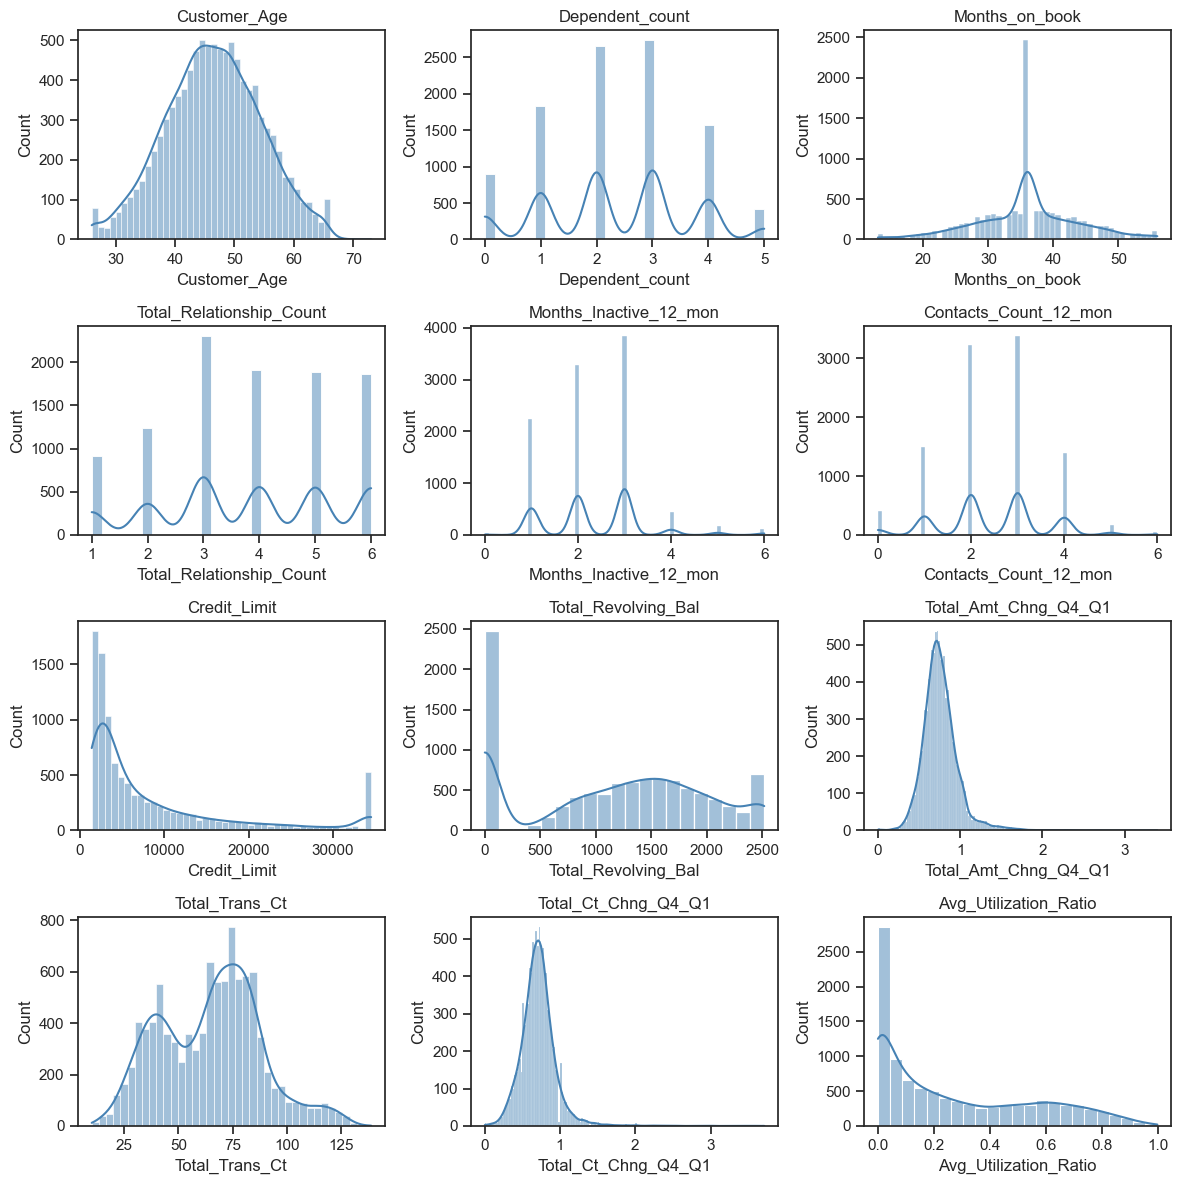

In [40]:
# Verificamos la distribución y si hay presencia de sesgo por outliers
outliers_columnas = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                     'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

for i, columna in enumerate(outliers_columnas):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(newbankchurn[columna], kde=True, ax=ax, color='steelblue')
    ax.set_title(columna)

plt.tight_layout()
plt.show()

In [41]:
# Se observa que una variable presentan una distrución normal que es 'Customer_Age' pero otras variables muestran un sesgo a la 
# derecha o izquierda, o una distribución multimodal lo que provoca que la media ya no sea un estimador representativo de la 
# tendencia central de los datos, por ende, para tratar esos valores atípicos se deberá dar más importancia a la mediana como 
# medida de ubicación central.

In [42]:
# TRATAMIENTO DE OUTLIERS

# Identificamos los outliers y los reemplazamos por NaN
for columna in outliers_columnas:
    q1 = newbankchurn[columna].quantile(0.25)
    q3 = newbankchurn[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    newbankchurn.loc[(newbankchurn[columna] < lower_bound) | (newbankchurn[columna] > upper_bound), columna] = np.nan

# Reemplazamos los NaN por la mediana de cada variable
newbankchurn[outliers_columnas] = newbankchurn[outliers_columnas].fillna(newbankchurn[outliers_columnas].median())

In [43]:
# Calculamos los límites de los valores atípicos para cada variable
for columna in outliers_columnas:
    q1 = newbankchurn[columna].quantile(0.25)
    q3 = newbankchurn[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Contamos los valores atípicos
    outliers = newbankchurn[(newbankchurn[columna] < lower_bound) | (newbankchurn[columna] > upper_bound)]
    num_outliers = len(outliers)

    print(f'Variable: {columna}')
    print(f'Número de valores atípicos: {num_outliers}')
    print(f'Límite inferior: {lower_bound}')
    print(f'Límite superior: {upper_bound}')
    print()

Variable: Customer_Age
Número de valores atípicos: 0
Límite inferior: 24.5
Límite superior: 68.5

Variable: Dependent_count
Número de valores atípicos: 0
Límite inferior: -2.0
Límite superior: 6.0

Variable: Months_on_book
Número de valores atípicos: 199
Límite inferior: 20.0
Límite superior: 52.0

Variable: Total_Relationship_Count
Número de valores atípicos: 0
Límite inferior: 0.0
Límite superior: 8.0

Variable: Months_Inactive_12_mon
Número de valores atípicos: 0
Límite inferior: 0.5
Límite superior: 4.5

Variable: Contacts_Count_12_mon
Número de valores atípicos: 0
Límite inferior: 0.5
Límite superior: 4.5

Variable: Credit_Limit
Número de valores atípicos: 794
Límite inferior: -5074.75
Límite superior: 15271.25

Variable: Total_Revolving_Bal
Número de valores atípicos: 0
Límite inferior: -1778.5
Límite superior: 3921.5

Variable: Total_Amt_Chng_Q4_Q1
Número de valores atípicos: 111
Límite inferior: 0.32250000000000006
Límite superior: 1.1504999999999999

Variable: Total_Trans_Ct
N

In [44]:
# Aunque hemos tratado los outliers para no eliminar información relevante, aún quedan valores atípicos pero no se eliminarán
# porque aparte de que podríamos introducir sesgo, también está el hecho de que el dataset está desbaleanceado porque una de las
# clases de la variable objetivo presenta mayor cantidad de datos que la otra, por ende, corremos el riesgo de eliminar una
# cantidad significativa de datos de la clase minoritaria si eliminamos los valores atípicos.

In [45]:
# Feature matrix
X = newbankchurn.drop('Attrition_Flag', 1)
# Target feature
y = newbankchurn['Attrition_Flag']

newbankchurn.head()

C:\Users\User\AppData\Local\Temp\ipykernel_19852\3927614656.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = newbankchurn.drop('Attrition_Flag', 1)


,ClientNum,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,1,3.0,2,2,3,1,39.0,5.0,1.0,3.0,12691.0,777.0,0.731,42.0,0.697,0.061
1,818770008,0,49.0,0,5.0,4,1,1,1,44.0,6.0,1.0,2.0,8256.0,864.0,0.731,33.0,0.697,0.105
2,713982108,0,51.0,1,3.0,4,2,4,1,36.0,4.0,1.0,3.0,3418.0,0.0,0.731,20.0,0.697,0.000
3,769911858,0,40.0,0,4.0,2,4,1,1,34.0,3.0,4.0,1.0,3313.0,2517.0,0.731,20.0,0.697,0.760
4,709106358,0,40.0,1,3.0,1,2,3,1,21.0,5.0,1.0,3.0,4716.0,0.0,0.731,28.0,0.697,0.000


In [46]:
# Implementamos la función creada en clase para obtener las características más significativas mediante el forward selection

import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [47]:
forward_selection(X,y)

C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.362943
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.440749
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.405450
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440759
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440572
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.439650
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440755
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.430708
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440582
  

C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.324856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.326083
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324879
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325076
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300223
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323351
  

C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.284257
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285961
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286530
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286867
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286670
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274886
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286841
  

C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.274789
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272496
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274070
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274470
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274884
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274684
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274015
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274685
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272269
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274362
  

C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.268975
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268727
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268387
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268678
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268605
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267916
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268775
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268287
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268721
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.268428
  

C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.267973
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267649
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267805
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267734
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267915
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267371
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267865
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267599
         Iterations 8


C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.267124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267053
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266960
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267044
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266945
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266554
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267049
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266923
         Iterations 8


C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\User\AppData\Local\Temp\ipykernel_19852\262934958.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Optimization terminated successfully.
         Current function value: 0.266484
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266424
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266477
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266554
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266473
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.266393
         Iterations 8


['Total_Trans_Ct',
 'Total_Revolving_Bal',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Total_Ct_Chng_Q4_Q1',
 'Contacts_Count_12_mon',
 'Gender',
 'Card_Category',
 'ClientNum',
 'Dependent_count',
 'Total_Amt_Chng_Q4_Q1']

In [48]:
# Construimos el nuevo df con las variables seleccionadas más la variable objetivo aunque no se tomará en cuenta 'ClientNum'
# ya que no es un predictor relevante para la rotación de clientes porque sólo es el identificador del cliente

newdata = newbankchurn[['Attrition_Flag', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 
                    'Months_Inactive_12_mon', 'Total_Ct_Chng_Q4_Q1', 'Gender', 'Contacts_Count_12_mon', 
                    'Dependent_count', 'Total_Amt_Chng_Q4_Q1', 'Card_Category']].copy()

In [49]:
# MUESTREAMOS LOS DATOS, CONSTRUYENDO UN DATASET DE TRAIN Y TEST

In [50]:
# Muestreo estratificado en función de la variable respuesta para que en los splits sus categorías estén bien representadas.
# Split 70/30.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(newdata.drop('Attrition_Flag', axis=1), newdata.Attrition_Flag, 
                                                    test_size = 0.3, random_state = 0, stratify = newdata.Attrition_Flag)

In [52]:
# Construimos un modelo analítico de clasificación que sea capaz de predecir cuando un cliente se fuga del banco

def metricas(y_real, y_pred): 
    false_positive_rate, recall, thresholds = roc_curve(y_real, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [53]:
# En base a los resultados de la evaluación de modelos de ML, se ha decidido tomar los modelos XGBoost y Random Forest ya que 
# tuvieron los mejores rendimientos en términos de capacidad de predicción y pueden explicar la mayor cantidad de variabilidad 
# en la variable objetivo 'Attrition_Flag'.

In [54]:
# MODELO DE ML PARA CLASIFICACIÓN

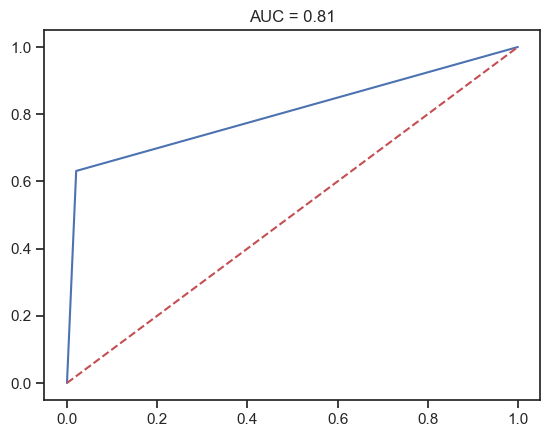

In [55]:
# Random Forest
classifier1 = RandomForestClassifier().fit(X_train, y_train)
pred1 = classifier1.predict(X_test)

# Métricas
metricas(y_test, pred1)

In [56]:
# Rendimiento del modelo
r2 = r2_score(y_test, pred1)
print('R2:', r2)

# Error absoluto medio
print('MAE:', mean_absolute_error(y_test, pred1))

# Error cuadrático medio
print('MSE:', mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred1)))

R2: 0.4336454363766058
MAE: 0.07634090161237249
MSE: 0.07634090161237249
RMSE: 0.27629857330860846


In [57]:
# El modelo obtuvo un buen rendimiento en términos de capacidad de predicción, al obtener un AUC de 0.81 y el valor del R2 
# indica que el modelo puede explicar el 43.36% de la variabilidad en la variable objetivo. En cuanto a las métricas de error 
# (MAE, MSE y RMSE) indican que las predicciones del modelo tienen un promedio de diferencia y error relativamente bajos, es 
# decir, que tienen un buen rendimiento en la predicción de valores cercanos a los reales. Sin embargo, el valor de R2 sugiere
# que el modelo aún puede mejorarse para explicar más variabilidad en la variable objetivo.

<Figure size 800x600 with 0 Axes>

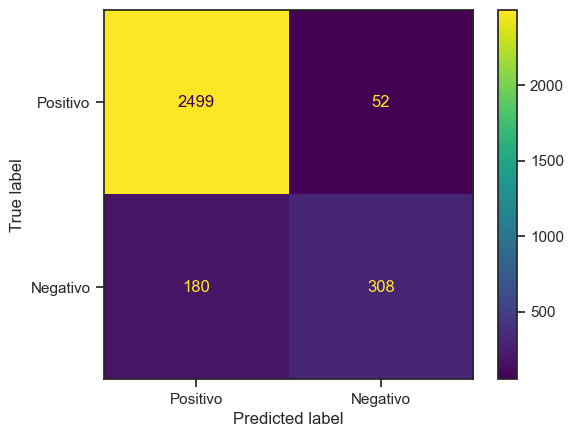

In [58]:
# Matriz de confusión
cm = confusion_matrix(y_test, pred1, labels=classifier1.classes_)
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positivo','Negativo'])
disp.plot()

In [59]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2551
           1       0.86      0.63      0.73       488

    accuracy                           0.92      3039
   macro avg       0.89      0.81      0.84      3039
weighted avg       0.92      0.92      0.92      3039



In [60]:
# Los resultados del classification report indican que el modelo está funcionando bien aunque la clasificación de la clase 0 es 
# la que presenta un mejor rendimiento comparada con la clase 1. El F1-score promedio es del 85%, lo que indica un buen 
# equilibrio general entre precision y recall. De forma más detallada tenemos lo siguiente:

# La precisión para la clase 0 es de 0.93, lo que indica que el 93% de las predicciones clasificadas como clase 0 son realmente 
# correctas. Para la clase 1, la precisión es de 0.86, lo que implica que el 86% de las predicciones clasificadas como clase 1
# son correctas.

# El recall para la clase 0 es de 0.98 lo que significa que el 98% de las instancias de la clase 0 se identifican correctamente.
# Para la clase 1, el recall es de 0.63, lo que indica que sólo se identifica correctamente el 63% de las instancias de la 
# clase 1.

# Para la clase 0, el f1-score es de 0.96, mientras que para la clase 1 es de 0.73 y sabemos que un F1-score más alto indica un
# mejor equilibrio entre precisión y recall. En este caso, el modelo tiene dificultades para clasificar correctamente las 
# instancias de la clase 1.

# El accuracy general del modelo es del 92%, lo que indica el porcentaje de predicciones correctas sobre el total de instancias.

In [61]:
# Validación cruzada
cv = cross_val_score(classifier1, X_train, y_train, scoring = 'roc_auc', cv = 5)
print('Valores ROC AUC para cada fold:', cv)
print('Promedio CV ROC:', cv.mean())
print('Desviación Estándar CV ROC:', np.std(cv))

Valores ROC AUC para cada fold: [0.93635928 0.94609133 0.9558971  0.94675897 0.94030071]
Promedio CV ROC: 0.9450814770261114
Desviación Estándar CV ROC: 0.006629386629554349


In [62]:
# Se obtuvo un alto CV ROC, lo que indica que el modelo tiene una excelente capacidad para distinguir entre instancias positivas
# y negativas. El promedio del modelo en 5 folds es 0.945 y la desviación estándar de los AUCs es 0.006, lo cual es un número 
# pequeño. Esto indica que el modelo tiene un desempeño consistentemente bueno en las 5 particiones de los datos.

In [63]:
# Calculamos el training error
training_error = np.mean(classifier1.predict(X_train) != y_train)

# Calculamos el validation error
validation_error = np.mean(classifier1.predict(X_test) != y_test)

print('Training error:', training_error)
print('Validation error:', validation_error)

Training error: 0.0
Validation error: 0.07634090161237249


In [64]:
# Los resultados indican que el modelo tiene un error de entrenamiento del 0% y un error de validación del 7.63%. No es un valor
# tan alto pero podríamos considerar un posible overfitting ya que, el modelo se ajusta demasiado a los datos de entrenamiento
# y tiene dificultades para generalizar a nuevos datos. Quizás una de las posibles razones podría ser el desbalance de las 
# clases ya que la variable objetivo 'Attrition_Flag' tiene una mayor cantidad de datos en una clase en comparación con la otra.
# Específicamente, tiene 8500 ejemplos de la clase 0 (cliente permanece en el banco) y sólo 1627 ejemplos de la clase 1 
# (cliente abandona el banco). Esta discrepancia en el tamaño de las clases puede afectar el rendimiento del modelo.

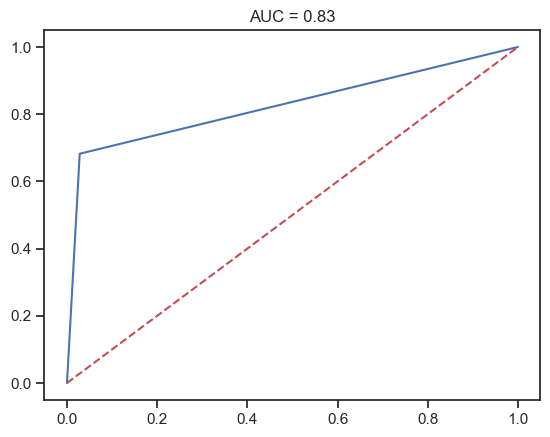

In [65]:
# XGBoost Classifier
classifier2 = XGBClassifier().fit(X_train, y_train)
pred2 = classifier2.predict(X_test)

# Métricas
metricas(y_test, pred2)

In [66]:
# Rendimiento del modelo
r2 = r2_score(y_test, pred2)
print('R2:', r2)

# Error absoluto medio
print('MAE:', mean_absolute_error(y_test, pred2))

# Error cuadrático medio
print('MSE:', mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred2)))

R2: 0.4458513536960754
MAE: 0.0746956235603817
MSE: 0.0746956235603817
RMSE: 0.2733050009794583


In [67]:
# El modelo obtuvo un buen rendimiento en términos de capacidad de predicción, al obtener un AUC de 0.83 y el valor del R2 
# indica que el modelo puede explicar el 44.59% de la variabilidad en la variable objetivo. En cuanto a las métricas de error 
# (MAE, MSE y RMSE) sus valores son bajos. Sin embargo, el valor de R2 sugiere que el modelo aún puede mejorarse porque hay un
# gran porcentaje de variabilidad en los datos que no está siendo capturado o explicado por el modelo.

<Figure size 800x600 with 0 Axes>

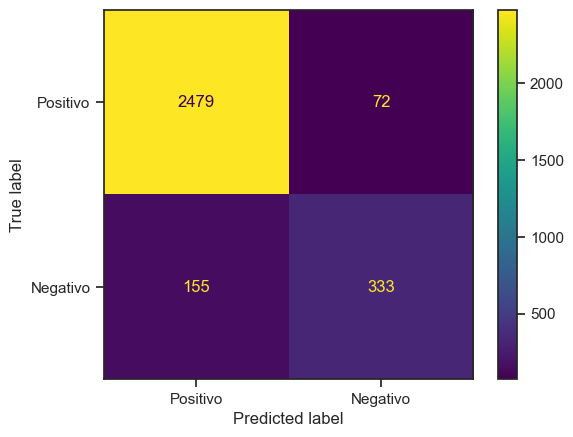

In [68]:
# Matriz de confusión
cm = confusion_matrix(y_test, pred2, labels=classifier2.classes_)
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positivo','Negativo'])
disp.plot()

In [69]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2551
           1       0.82      0.68      0.75       488

    accuracy                           0.93      3039
   macro avg       0.88      0.83      0.85      3039
weighted avg       0.92      0.93      0.92      3039



In [70]:
# Los resultados del classification report indican que el modelo está funcionando bien aunque la clasificación de la clase 0 es 
# la que presenta un mejor rendimiento comparada con la clase 1. 

# La precisión para la clase 0 es de 0.94, lo que indica que el 94% de las predicciones clasificadas como clase 0 son 
# realmente correctas. Para la clase 1, la precisión es de 0.82, lo que implica que el 82% de las predicciones clasificadas
# como clase 1 son correctas.

# El recall para la clase 0 es de 0.97 lo que significa que el 97% de las instancias de esta clase se identifican correctamente.
# Para la clase 1, el recall es de 0.68, lo que indica que sólo se identifica correctamente el 68% de las instancias de la 
# clase 1.

# Para la clase 0, el f1-score es de 0.96, mientras que para la clase 1 es de 0.75 y sabemos que un F1-score más alto indica
# un mejor equilibrio entre precisión y recall. En este caso, el modelo tiene dificultades para clasificar correctamente las 
# instancias de la clase 1.

# El accuracy del modelo es del 93%, lo que indica el porcentaje de predicciones correctas sobre el total de instancias.

In [71]:
# Validación cruzada
cv = cross_val_score(classifier2, X_train, y_train, scoring = 'roc_auc', cv = 5)
print('Valores ROC AUC para cada fold:', cv)
print('Promedio CV ROC:', cv.mean())
print('Desviación Estándar CV ROC:', np.std(cv))

Valores ROC AUC para cada fold: [0.93928571 0.94987469 0.95883459 0.95001666 0.95059611]
Promedio CV ROC: 0.9497215507417958
Desviación Estándar CV ROC: 0.006210144791261197


In [72]:
# Los valores obtenidos indican que el modelo tiene un buen rendimiento en términos de la capacidad de distinguir entre las 
# clases y presenta una consistencia razonable en su rendimiento en diferentes folds.

In [73]:
# Calculamos el training error
training_error = np.mean(classifier2.predict(X_train) != y_train)

# Calculamos el validation error
validation_error = np.mean(classifier2.predict(X_test) != y_test)

print('Training error:', training_error)
print('Validation error:', validation_error)

Training error: 0.004655756207674944
Validation error: 0.0746956235603817


In [74]:
# Los resultados indican que modelo ha clasificado incorrectamente aproximadamente el 0.47% de los ejemplos en el conjunto de
# entrenamiento y también ha clasificado incorrectamente aproximadamente el 7.47% de los ejemplos en el conjunto de validación.
# Estamos ante un posible caso de overfitting porque el training error es bajo pero el validation error es alto. Asimismo, como
# se mencionó previamente, el desbalance de las clases es un posible causa del rendimiento del modelo.